In [1]:
# librerías a utilizar
import numpy as np 
import pandas as pd
import datetime as datetime

# plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

In [2]:
# cargamos los datos
events = pd.read_csv('events.csv', low_memory = False)
events['timestamp'] = pd.to_datetime(events['timestamp'], errors = 'coerce', format= '%Y-%m-%d')
events.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
screen_resolutions = events[['screen_resolution', 'device_type', 'event']].groupby(['screen_resolution', 'device_type']).agg({'event':'count'})
screen_resolutions = screen_resolutions.reset_index().sort_values(by='event', ascending=False)
screen_resolutions.head()

,screen_resolution,device_type,event
196,360x640,Smartphone,29965
79,1366x768,Computer,21296
172,320x534,Smartphone,3619
124,1920x1080,Computer,3489
177,320x570,Smartphone,2560


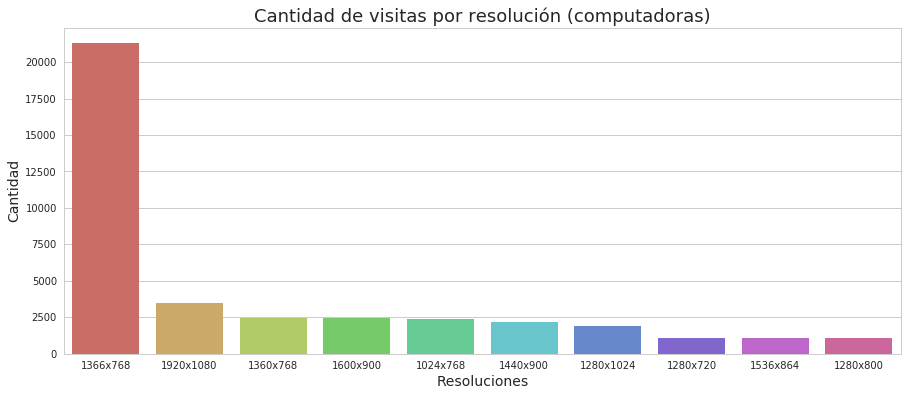

In [68]:
computer_df = screen_resolutions[screen_resolutions['device_type'] == 'Computer']

plt.figure(figsize=(15,6))
g = sns.barplot(x= computer_df.screen_resolution[:10], y=computer_df.event, orient= 'v', palette="hls")
g.set_title('Cantidad de visitas por resolución (computadoras)',fontsize = 18)
g.set_xlabel('Resoluciones',fontsize = 14)
g.set_ylabel('Cantidad',fontsize = 14);

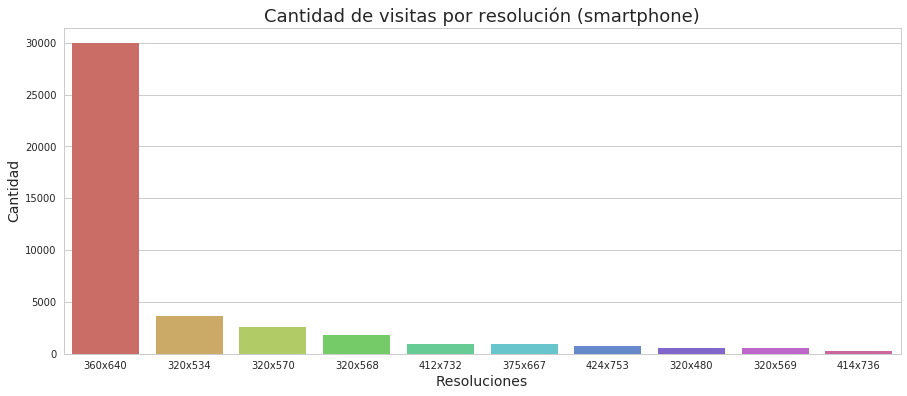

In [70]:
smartphone_df = screen_resolutions[screen_resolutions['device_type'] == 'Smartphone']

plt.figure(figsize=(15,6))
g = sns.barplot(x= smartphone_df.screen_resolution[:10], y=smartphone_df.event, orient= 'v', palette="hls")
g.set_title('Cantidad de visitas por resolución (smartphone)',fontsize = 18)
g.set_xlabel('Resoluciones',fontsize = 14)
g.set_ylabel('Cantidad',fontsize = 14);

In [81]:
persons = events[events['screen_resolution'] == '1920x1080'][['person']]
conversions = events[events['event'] == 'conversion'][['person', 'model']]
merged = pd.merge(persons, conversions, on='person', how='left')
merged = merged.drop_duplicates()
merged = merged.groupby('model').agg({'person':'count'}).sort_values(by='person', ascending=False).reset_index().head()
merged['price'] = [619, 499, 1889, 789, 1429]
merged.columns = ['resolution', 'quantity', 'price']
merged

,resolution,quantity,price
0,iPhone 5s,7,619
1,Samsung Galaxy J7 Prime,4,499
2,Samsung Galaxy S8,4,1889
3,Samsung Galaxy A5,3,789
4,iPhone 6S,3,1429


In [82]:
persons = events[events['screen_resolution'] == '1024x768'][['person']]
conversions = events[events['event'] == 'conversion'][['person', 'model']]
merged = pd.merge(persons, conversions, on='person', how='left')
merged = merged.drop_duplicates()
merged = merged.groupby('model').agg({'person':'count'}).sort_values(by='person', ascending=False).reset_index().head()
merged['price'] = [609, 1429, 1449, 1129, 499]
merged.columns = ['resolution', 'quantity', 'price']
merged

,resolution,quantity,price
0,Samsung Galaxy J5,7,609
1,iPhone 6S,4,1429
2,iPhone 6 Plus,3,1449
3,iPhone 6,3,1129
4,Samsung Galaxy J7,2,499
